 # KNN Classification of Wheat Seed Varieties

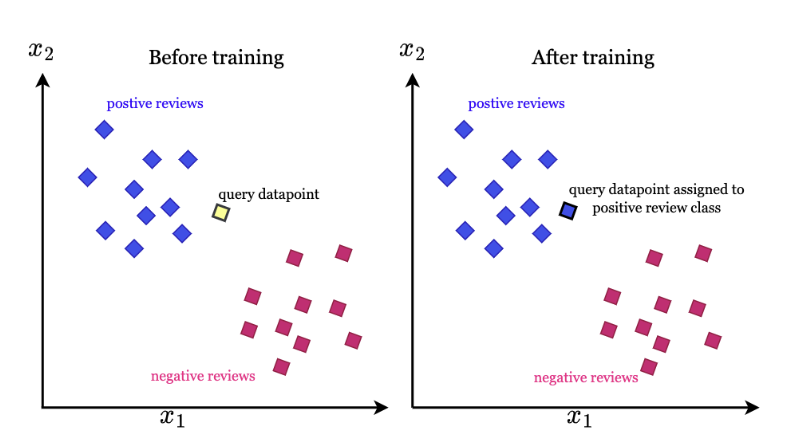

### 📊 Dataset Overview: Wheat Seeds Dataset

This dataset contains measurements of wheat kernels from three different varieties.

Each row represents one seed, and the goal is to classify the variety of wheat based on physical characteristics.

### 🔸 Features (Input Columns):

Column Name	Description

Area:	The surface area of the seed (in mm²)

Perimeter:	The perimeter length around the seed (in mm)

Compactness:	How compact or round the seed is; calculated using area and perimeter

KernelLength:	Length of the kernel

KernelWidth:	Width of the kernel

AsymmetryCoeff:	Measures how asymmetric (non-uniform) the seed shape is

GrooveLength:	Length of the groove on the seed surface (important for wheat quality)


### 🔹 Target (Output Column):

Column Name	Description

Class:	Wheat variety (0, 1, or 2)

0 = Kama wheat, 1 = Rosa wheat, 2 = Canadian wheat

In [8]:
# 📌 Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter

In [9]:
# 📌 Step 2: Load Seeds Dataset from UCI repository

column_names = [
    "Area", "Perimeter", "Compactness", "KernelLength", "KernelWidth",
    "AsymmetryCoeff", "GrooveLength", "Class"
]
data = pd.read_csv('seeds_dataset.txt', delim_whitespace=True, names=column_names)
data.head()

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoeff,GrooveLength,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [12]:
# 📌 Step 3: Prepare features and labels
X = data.iloc[:, :-1].values       # All columns except last
y = data.iloc[:, -1].values        # Last column = class labels (1, 2, 3)


In [14]:
# 📌 Step 4: Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape,y_train.shape

((168, 7), (168,))

In [5]:

# 📌 Step 5: Define Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


In [6]:

# 📌 Step 6: Define KNN Classifier from scratch
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])  # Predict for each sample

    def _predict(self, x):
        # 📌 Calculate distance between x and all training samples
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # 📌 Find the indices of k smallest distances
        k_indices = np.argsort(distances)[:self.k]  # np.argsort returns sorted indices

        # 📌 Collect the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # 📌 Count the frequency of each label
        most_common = Counter(k_nearest_labels).most_common(1)

        # 📌 Return the label with the highest count (majority vote)
        return most_common[0][0]


In [16]:

# 📌 Step 7: Initialize model, train and predict
knn = KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# 📌 Step 8: Evaluate model accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy on Seeds Dataset: {accuracy:.2f}")


Accuracy on Seeds Dataset: 0.86
